# **6530611033 Thanawat Wiriyathamsopon**

# **Clustering**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cluster_path = '/content/drive/MyDrive/Colab Notebooks/project_baselearning/Cluster Analysis'

In [ ]:
!pip install scikit-image==0.19.3

In [ ]:
import cv2
import numpy as np
from skimage.feature import greycomatrix, greycoprops, local_binary_pattern
from skimage.color import rgb2gray
from skimage.measure import regionprops
from skimage import io
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

**Data Preprocessing**

In [ ]:
import cv2
import numpy as np
from skimage.feature import greycomatrix, greycoprops, local_binary_pattern
import os

def extract_features(image_path):
    # Load the image
    img = cv2.imread(image_path)

    # Check if the image was loaded successfully
    if img is None:
        raise ValueError(f"Could not load image: {image_path}")

    # Convert the image to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # GLCM Texture Features
    glcm = greycomatrix(gray_img, [1], [0], symmetric=True, normed=True)
    contrast = greycoprops(glcm, 'contrast')[0, 0]
    correlation = greycoprops(glcm, 'correlation')[0, 0]
    energy = greycoprops(glcm, 'energy')[0, 0]
    homogeneity = greycoprops(glcm, 'homogeneity')[0, 0]

    # Color Features (Average Color)
    avg_color = np.mean(img, axis=(0, 1))  # Average RGB color

    # Shape Features (Area and Perimeter)
    contours, _ = cv2.findContours(gray_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    area = sum([cv2.contourArea(c) for c in contours])  # Total area of contours
    perimeter = sum([cv2.arcLength(c, True) for c in contours])  # Perimeter of contours

    # Local Binary Pattern (LBP) Feature
    lbp = local_binary_pattern(gray_img, P=8, R=1, method='uniform')
    lbp_hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, 11), range=(0, 10))
    lbp_hist = lbp_hist / lbp_hist.sum()  # Normalize histogram

    # Create the feature vector
    feature_vector = np.array(
        [contrast, correlation, energy, homogeneity] +
        avg_color.tolist() +
        [area, perimeter] +
        lbp_hist.tolist()
    )

    return feature_vector

In [ ]:
def process_images_in_directory(directory_path):
    # Check if the directory exists
    if not os.path.exists(directory_path):
        raise ValueError(f"Directory does not exist: {directory_path}")

    # Iterate through all image files in the directory
    features_list = []
    for filename in os.listdir(directory_path):
        file_path = os.path.join(directory_path, filename)

        # Check if it is an image file
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            try:
                # Extract features and append to the list
                features = extract_features(file_path)
                features_list.append((filename, features))
            except Exception as e:
                print(f"Error processing {file_path}: {e}")

    return features_list

In [ ]:
cluster_path = '/content/drive/MyDrive/Colab Notebooks/project_baselearning/Cluster Analysis'
features = process_images_in_directory(cluster_path)

# Output the features for each image
for filename, feature_vector in features:
    print(f"Features for {filename}: {feature_vector}")

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Features for IMG_061.jpg: [1.29854489e+02 9.64487682e-01 1.41089279e-02 1.32592115e-01
 6.50099660e+01 8.84670300e+01 1.02823530e+02 9.98001000e+05
 3.99600000e+03 7.39700000e-02 8.01900000e-02 7.92790000e-02
 1.13031000e-01 1.30167000e-01 1.03924000e-01 8.20870000e-02
 8.47180000e-02 9.70230000e-02 1.55611000e-01]
Features for IMG_079.jpg: [8.12452703e+01 9.71169138e-01 1.62291195e-02 1.59761794e-01
 9.67771690e+01 1.46737352e+02 1.64636118e+02 9.98001000e+05
 3.99600000e+03 6.59080000e-02 7.57180000e-02 7.74190000e-02
 1.19601000e-01 1.45634000e-01 1.20529000e-01 8.95160000e-02
 7.97170000e-02 8.49010000e-02 1.41057000e-01]
Features for IMG_076.jpg: [7.42858178e+01 9.76342082e-01 1.59244506e-02 1.67707636e-01
 8.65788390e+01 1.45576361e+02 1.60543548e+02 9.98001000e+05
 3.99600000e+03 6.92990000e-02 7.95330000e-02 7.71380000e-02
 1.14688000e-01 1.33648000e-01 1.12623000e-01 8.73880000e-02
 8.43330000e-02 9.24060000e-02 1.48944000e-01]
Features for IMG_066.jpg: [6.79114725e+01 9.65477

In [ ]:
# ดึงค่าฟีเจอร์จาก features
# features = [(filename, feature_vector), ...] ที่ได้จาก process_images_in_directory
file_names = [f[0] for f in features]           # ชื่อไฟล์
feature_vectors = np.array([f[1] for f in features])  # ฟีเจอร์เวกเตอร์

In [ ]:
# Assuming feature_vectors is a NumPy array
feature_df = pd.DataFrame(feature_vectors) # Convert feature_vectors to DataFrame

# StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(feature_df)

# ใช้ PCA ลดมิติข้อมูล
pca = PCA(n_components=2)  # เก็บ 90% ของ Variance
pca_features = pca.fit_transform(scaled_features)
print(f"PCA Explained Variance Ratio: {pca.explained_variance_ratio_}")

PCA Explained Variance Ratio: [0.59164176 0.19575316]


In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA

# 1. Partitioning Approach - K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(feature_vectors)

# 2. Hierarchical Approach - Agglomerative Clustering
hierarchical = AgglomerativeClustering(n_clusters=2)
hierarchical_labels = hierarchical.fit_predict(feature_vectors)

# ลดมิติข้อมูลสำหรับการแสดงผล (ใช้ PCA)
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(feature_vectors)

In [ ]:
kmeans_silhouette = silhouette_score(pca_features, kmeans_labels)
hierarchical_silhouette = silhouette_score(pca_features, hierarchical_labels)

print(f"K-Means Silhouette Score: {kmeans_silhouette}")
print(f"Hierarchical Silhouette Score: {hierarchical_silhouette}")

K-Means Silhouette Score: 0.46005779510595096
Hierarchical Silhouette Score: 0.6099102234507623


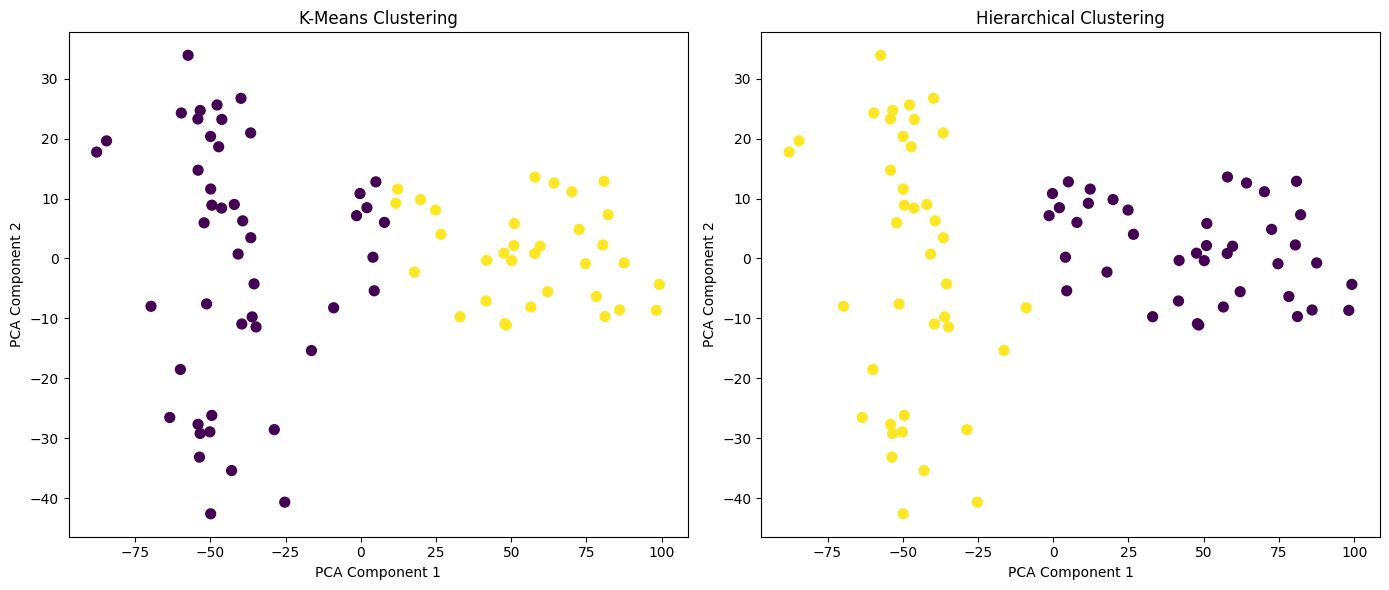

In [ ]:
# Visualization
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# K-Means Plot
ax[0].scatter(reduced_features[:, 0], reduced_features[:, 1], c=kmeans_labels, cmap='viridis', s=50)
ax[0].set_title('K-Means Clustering')
ax[0].set_xlabel('PCA Component 1')
ax[0].set_ylabel('PCA Component 2')

# Hierarchical Plot
ax[1].scatter(reduced_features[:, 0], reduced_features[:, 1], c=hierarchical_labels, cmap='viridis', s=50)
ax[1].set_title('Hierarchical Clustering')
ax[1].set_xlabel('PCA Component 1')
ax[1].set_ylabel('PCA Component 2')

plt.tight_layout()
plt.show()

# Optional: Dendrogram for Hierarchical Clustering
from scipy.cluster.hierarchy import dendrogram, linkage
plt.show()

# **Association Rule**

In [ ]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')
# Redirect to dataset folder
%cd /content/drive/MyDrive/Colab Notebooks/project_baselearning/Association Rule Analysis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/project_baselearning/Association Rule Analysis


**เช็คข้อมูล**

In [ ]:
# Import necessary libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data = pd.read_csv("ecommerce_clickstream_transactions.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Data** Preprocessing

In [ ]:
# ตรวจสอบค่าที่หายไป
missing_data = data.isnull().sum()

print("จำนวนค่าที่หายไปในแต่ละคอลัมน์:")
print(missing_data)

จำนวนค่าที่หายไปในแต่ละคอลัมน์:
UserID           0
SessionID        0
Timestamp        0
EventType        0
ProductID    42704
Amount       64135
Outcome      64135
dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# อ่านข้อมูล
ecommerce = pd.read_csv('ecommerce_clickstream_transactions.csv')

# ลบ NaN ในคอลัมน์สำคัญ
ecommerce = ecommerce.dropna(subset=['SessionID', 'ProductID'])

# กรองสินค้าเฉพาะที่ปรากฏในธุรกรรมจำนวนมาก
min_occurrence = 5  # สินค้าต้องปรากฏอย่างน้อย 5 ครั้ง
frequent_products = ecommerce['ProductID'].value_counts()
frequent_products = frequent_products[frequent_products >= min_occurrence].index
ecommerce_filtered = ecommerce[ecommerce['ProductID'].isin(frequent_products)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# สร้าง Basket
basket = ecommerce_filtered.groupby(['SessionID', 'ProductID'])['ProductID'].count().unstack().fillna(0)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-46-3709c64c3e35>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)


In [ ]:
# ลดขนาดข้อมูล
sample_transactions = 200  # จำนวนธุรกรรม
sample_products = 50       # จำนวนสินค้า
basket_sample = basket.sample(n=min(sample_transactions, basket.shape[0]), random_state=42)
basket_sample = basket_sample.iloc[:, :sample_products]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from mlxtend.frequent_patterns import fpgrowth
# สร้าง Frequent Itemsets
min_support = 0.3  # Minimum Support
frequent_itemsets = fpgrowth(basket_sample, min_support=min_support, use_colnames=True)

# ตรวจสอบ Frequent Itemsets
if frequent_itemsets.empty:
    print("ไม่มี Frequent Itemsets ที่ตรงตามค่า min_support")
else:
    print("\nFrequent Itemsets:")
    print(frequent_itemsets.head())



Frequent Itemsets:
   support     itemsets
0      0.7  (prod_1042)
1      0.6  (prod_1059)
2      0.6  (prod_1016)
3      0.6  (prod_1052)
4      0.6  (prod_1131)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
from mlxtend.frequent_patterns import association_rules

# สร้าง Association Rules
min_confidence = 0.7  # Minimum Confidence
# Assuming num_itemsets should be the length of frequent_itemsets:
num_itemsets = len(frequent_itemsets)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence, num_itemsets=num_itemsets)
rules = rules.sort_values(by='confidence', ascending=False)

# แสดง Strong Association Rules
print("\nStrong Association Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))


Strong Association Rules:
                                       antecedents             consequents  \
0                           (prod_1016, prod_1059)             (prod_1052)   
4226                        (prod_1093, prod_1141)  (prod_1143, prod_1044)   
4237             (prod_1044, prod_1023, prod_1093)  (prod_1086, prod_1141)   
4236             (prod_1044, prod_1141, prod_1093)  (prod_1086, prod_1023)   
4235             (prod_1044, prod_1086, prod_1093)  (prod_1141, prod_1023)   
4234  (prod_1093, prod_1086, prod_1141, prod_1023)             (prod_1044)   
4233  (prod_1044, prod_1086, prod_1141, prod_1023)             (prod_1093)   
4232  (prod_1044, prod_1141, prod_1023, prod_1093)             (prod_1086)   
4231  (prod_1044, prod_1086, prod_1023, prod_1093)             (prod_1141)   
4230  (prod_1044, prod_1086, prod_1141, prod_1093)             (prod_1023)   

      support  confidence      lift  
0         0.3         1.0  1.666667  
4226      0.3         1.0  2.500000  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
